<a name="top"></a>
># Relevancia de los defectos ópticos en la actualidad y mejor solución económica a estos problemas

<a id="indice"></a> <br>
## Índice

1. [Introducción](#1)
2. [Hipotesis inicial](#2)
3. [Preparacion de Webscrapping](#3)
4. [Prevalencia de miopía en EEUU](#4)  
    4.1. [Conclusiones EEUU](#41)
5. [Valoracion de datos Dataset niñ@s](#5)  
    5.1. [Conclusiones niñ@s](#51)
6. [Valoración de datos Ópticas](#6)  
    6.1. [Conclusiones Ópticas](#61)
7. [Resumen conclusiones finales](#7)


<a id="1"></a> <br>
## 1. Introducción 

Para empezar todo el estudio y el analisis de nuestras fuentes de datos primero vamos a explicar cual es el origen de las fuentes.
1. El primer dataset nos muestra la prevalencia de las diferentes enfermedades oculares en EEUU y en cada estado.,  ["Vault Analytics" Prevelance of Eye Diseases in US.csv (2017)](https://data.world/datacrunch/prevalence-of-vision-problems-in-the-u-s/)
2. En el segundo dataset tenemos las caracteristicas de los ojos de 618 niños,uso de la vision en diferentes ambitos e información sobre sus padre y madre.  
["Zadnik K, Mutti DO, Friedman NE, Qualley PA, Jones LA, Qui P, Kim HS, Hsu JC, Moeschberger ML. Ocular predictors of the onset of juvenile myopia. Invest Ophthalmol Vis Sci. 1999 Aug;40(9):1936-43. PMID: 10440246." myopia.csv](https://www.kaggle.com/datasets/mscgeorges/myopia-study)
3. El tercer dataset será construido a partir de precios de lentes de contacto, líquidos para lentes de contacto y monturas con cristales de 4 opticas diferentes con la ayuda de la libreria *beatifulsoup*. [Enlace a csv ordenado](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/Data/Data_main/todo_conc_opticas.csv)

[Volver al indice](#indice)

<a id="2"></a> <br>
## 2. Hipotesis inicial  
- Predominancia de la miopía como afección visual mayoritaria.
- El componente genetico en la miopía es de gran relevancia, además de otros valores como la longitud axial del ojo (distancia desde la superficie de la cornea hasta la retina)
- Las ópticas emergentes tienen precios más competitivos que las que están asentadas en el mercado.


[Volver al indice](#indice)

<a id="3"></a> <br>
## 3. Preparación de dataset mediante webscrapping
Para ello primero empezamos a buscar paginas web de ópticas que tuvieran oferta de productos en las páginas web, ya que por lo general, en este sector los precios suelen obtenerse de manera presencial en la misma optica.  
  
En cuanto a las ópticas que decidimos obtener los precios eran los que tenian oferta mayoritaria de producto propio tanto de gafas como de lentes de contacto.
    
Las ópticas son las siguientes:
- **Alain Afflelou**  
    Gran empresa de óptica en Europa (Fund.1972).
- **Grey Hounders**  
    Óptica de reciente apertura (2018).
- **Opticalia**  
    Empresa creada en 2008 con tiendas en España y sudamérica
- **Optica Universitaria**  
    Empresa recientemente adquirida por un grupo alemán de gran prestigio. (Fund.1992)

Para el webscrapping utilice beautiful soup, en este [enlace](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/webscrapping_opticas.ipynb) a un jupiter notebook muestro como obtengo toda la información. 

En estos 4 enlaces también muestro como voy ordenando y limpiando datos para concatenarlos todos en uno [solo](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/main_concat.ipynb) y obtener el dataset que necesito para obtener informacion:  
    
[Fix Afflelou](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/fix_data_scrap_aff.ipynb)  
[Fix Grey](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/fix_data_scrap_grey.ipynb)  
[Fix Opticalia](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/fix_data_scrap_opticalia.ipynb)  
[Fix Universitaria](https://github.com/Kuja182/Data-Science-PortFolio/blob/main/Relevancia_defectos_%C3%B3pticos/src/notebooks/fix_data_scrap_ou.ipynb)  


  
En cuanto a dificultades en el proceso, muchas de las fuentes que tenia que coger de diferentes partes, como producto, nombre, etc.. estaban en cada url de diferente manera...Tuve que ir poco a poco buscando la información concreta e ir recopilandola.  
  
Ahora que ya tengo toda la informacion recopilada en tres dataset, voy a ir analizando paso por paso


[Volver al indice](#indice)

<a id="4"></a> <br>
## 4. Prevalencia de miopía en muestra de EEUU

Primero importamos las librerias fundamentales para desarrollar el analisis y cargamos el dataset en un dataframe llamado **eye_dis**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
eye_dis = pd.read_csv("./Data/Data_main/Prevelance of Eye Diseases in US.csv")
eye_dis["prevalence_rate"] = eye_dis["prevalence_rate"].str.replace('"',"").str.replace(",",".").astype(float)

In [4]:
eye_dis.head(5)

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
1,UNITED_STATES,AMD,ALL,ALL,50-54,79268,0.0036,22298125
2,UNITED_STATES,AMD,ALL,ALL,55-59,81083,0.0041,19664805
3,UNITED_STATES,AMD,ALL,ALL,60-64,95553,0.0057,16817924
4,UNITED_STATES,AMD,ALL,ALL,65-69,113107,0.0091,12435263


In [6]:
eye_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            52260 non-null  object 
 1   vision_problem   52260 non-null  object 
 2   race             52260 non-null  object 
 3   sex              52260 non-null  object 
 4   age              52260 non-null  object 
 5   number_of_cases  52260 non-null  int64  
 6   prevalence_rate  52260 non-null  float64
 7   population       52260 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


Una vez obtenido toda la información, queremos tener dos dataframes para poder manejarlo de tal manera que podamos estar viendo por un lado la prevalencia general en EEUU y por otra la prevalencia por estado.  
  
También quiero saber que información tenemos en los problemas de vision para tenerlos localizados.

In [8]:
eye_dis["vision_problem"].unique()

array(['AMD', 'BLINDNESS', 'CATARACT', 'DIABETIC_RETINOPATHY', 'GLAUCOMA',
       'HYPEROPIA', 'MYOPIA', 'VISION_IMPAIRMENT'], dtype=object)

Cada problema concreto los vemos a continuación:  
  
*AMD* --> Age-Related Macular Degeneration (Degeneración macular asociada a la edad)  
*BLINDNESS* --> Ceguera  
*CATARACT* --> Cataratas, opacidad del cristalino.  
*DIABETIC_RETINOPATHY* --> Retinopatia diabetica, es una afección del ojo que puede causar pérdida de visión y ceguera en personas con diabetes. Afecta los vasos sanguíneos de la retina.  
*GLAUCOMA* --> es un grupo de enfermedades de los ojos que pueden causar pérdida de visión y ceguera al dañar el nervio óptico.
*HYPEROPIA* --> Es un error de refracción que hace que los objetos cercanos se vean borrosos. Se presenta cuando la forma del ojo hace que la luz se enfoque por detrás de la retina en lugar de directamente en la retina.   
*MYOPIA* --> es una afección frecuente de la visión en la que los objetos cercanos se ven claros y los objetos lejanos se ven borrosos. La luz se enfoca delante de la retina en lugar de directamente en la retina.  
*VISION_IMPAIRMENT* --> No llegar a tener una visión adecuada en ambos ojos (del 100% incluso con graduación)


Los datos en cuanto a las prevalencias al principio no me encajaban hasta que me di cuentas que los valores totales en la primera fila donde engloba los totales de cada problema visual y cada estado, no tiene en cuenta el numero de personas que no tienen ningun problema, al hacer la cuenta con el general de toda la muestra *(population = 142648393)* me cuadraron todas las cuentas.

Dicho lo cual, como los datos relativos a edad y sexo no los quería resaltar en el analisis. Empece por unir los totales de EEUU y de cada estado

In [9]:
cond_1 = eye_dis["age"] == "ALL"
cond_2 = eye_dis["race"] == "ALL"
cond_3 = eye_dis["sex"] == "ALL"
cond_sts = eye_dis["state"] != "UNITED_STATES"
cond_usa = eye_dis["state"] == "UNITED_STATES"

eeuu_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_usa]
states_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_sts]

In [10]:
EEUU_probl_prv = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')
states_probl_prv = states_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')

Empezamos primero analizando la muestra general por cada problema en EEUU

In [11]:
EEUU_probl_prv

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT
state,,,,,,,,
UNITED_STATES,0.0209,0.009,0.1711,0.0539,0.0191,0.0995,0.2392,0.0204


Voy a añadir una nueva columna llamada "EMMETROPIC" ya que no teniamos el porcentaje de personas de la muestra que no tenian ningun problema.

In [12]:
print("La predominancia de problemas visuales de esta muestra es del",100*EEUU_probl_prv.loc["UNITED_STATES"].sum(),"%")
print("De los cuales la mayor predominancia sobre todas ellas es la miopia con un",100*(EEUU_probl_prv.loc["UNITED_STATES"].max().round(3)),"%")
EEUU_probl_prv["EMMETROPIC"] = 1 - EEUU_probl_prv.loc['UNITED_STATES'].sum()  #Añadimos otra columna a este dataframe para visualizar también la gente que no tiene problemas en esta muestra de gente.

La predominancia de problemas visuales de esta muestra es del 63.31 %
De los cuales la mayor predominancia sobre todas ellas es la miopia con un 23.9 %


Quiero que se vea representado en porcentajes las prevalencias

In [13]:
EEUU_probl_prv = EEUU_probl_prv * 100

In [14]:
EEUU_probl_prv.head()

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT,EMMETROPIC
state,,,,,,,,,
UNITED_STATES,2.09,0.9,17.11,5.39,1.91,9.95,23.92,2.04,36.69


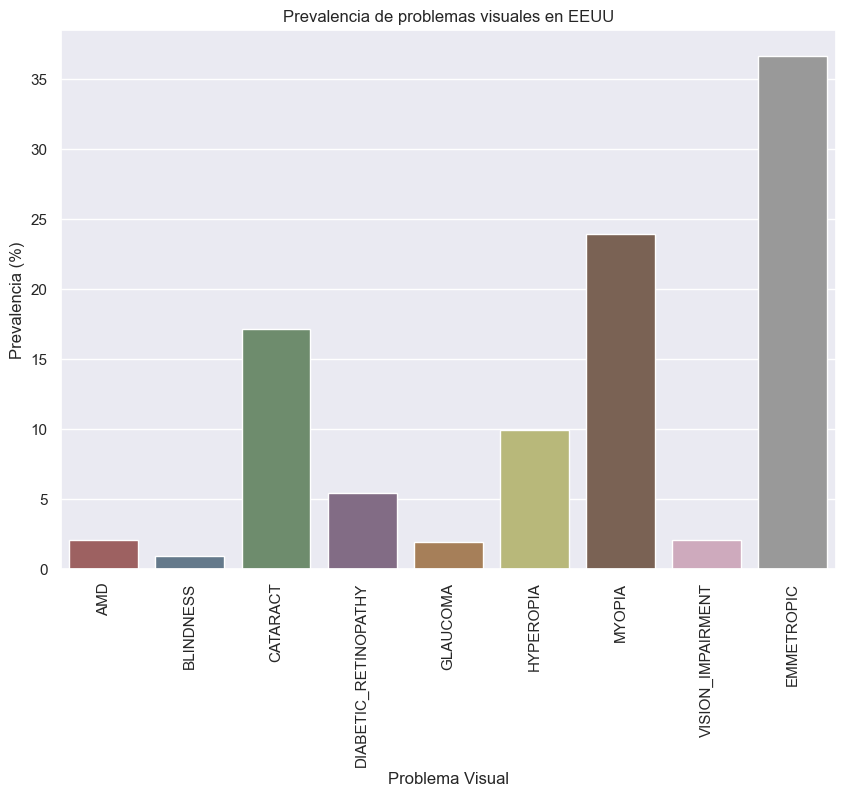

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=EEUU_probl_prv,palette="Set1",saturation=0.3)
plt.xticks(rotation=90);
plt.title("Prevalencia de problemas visuales en EEUU")
plt.xlabel("Problema Visual")
plt.ylabel("Prevalencia (%)")
sns.set(style="darkgrid")

Vemos en el gráfico como destaca la miopia sobre todas ellas, solo hay apenas un 13% de diferencia entre gente sin problemas y miopes.  
  
Esta muestra es de 2017 y se prevee que en 2050 en el mundo tengamos un 50% de miopia...
sabiendo que el dato en EEUU es del 23.92% es preocupante.  
  
Ahora nos vamos a centrar en la prevalencia de cada estado. 

In [17]:
states_probl_prv.head()

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT
state,,,,,,,,
ALABAMA,0.0191,0.009,0.1720,0.0521,0.0208,0.0985,0.2333,0.0182
ALASKA,0.0120,0.005,0.1239,0.0469,0.0142,0.0861,0.2579,0.0113
ARIZONA,0.0206,0.008,0.1792,0.0577,0.0178,0.1043,0.2351,0.0206
ARKANSAS,0.0214,0.009,0.1805,0.0524,0.0193,0.1053,0.2423,0.0201
CALIFORNIA,0.0188,0.008,0.1615,0.0582,0.0188,0.0915,0.2251,0.0205


In [32]:
len(states_probl_prv)

51

Como vemos hay 51 estados...pero hay 51 estados? Obviamente no, está contando District of Columbia como un estado, aunque es un distrito federal. Teniendo en cuenta ello tambien haremos la predominancia en el distrito de Columbia ya que disponemos de la información.

In [18]:
states_probl_prv["EMMETROPIC"] = 1 - states_probl_prv.sum(axis=1)

In [19]:
states_probl_prv = states_probl_prv * 100

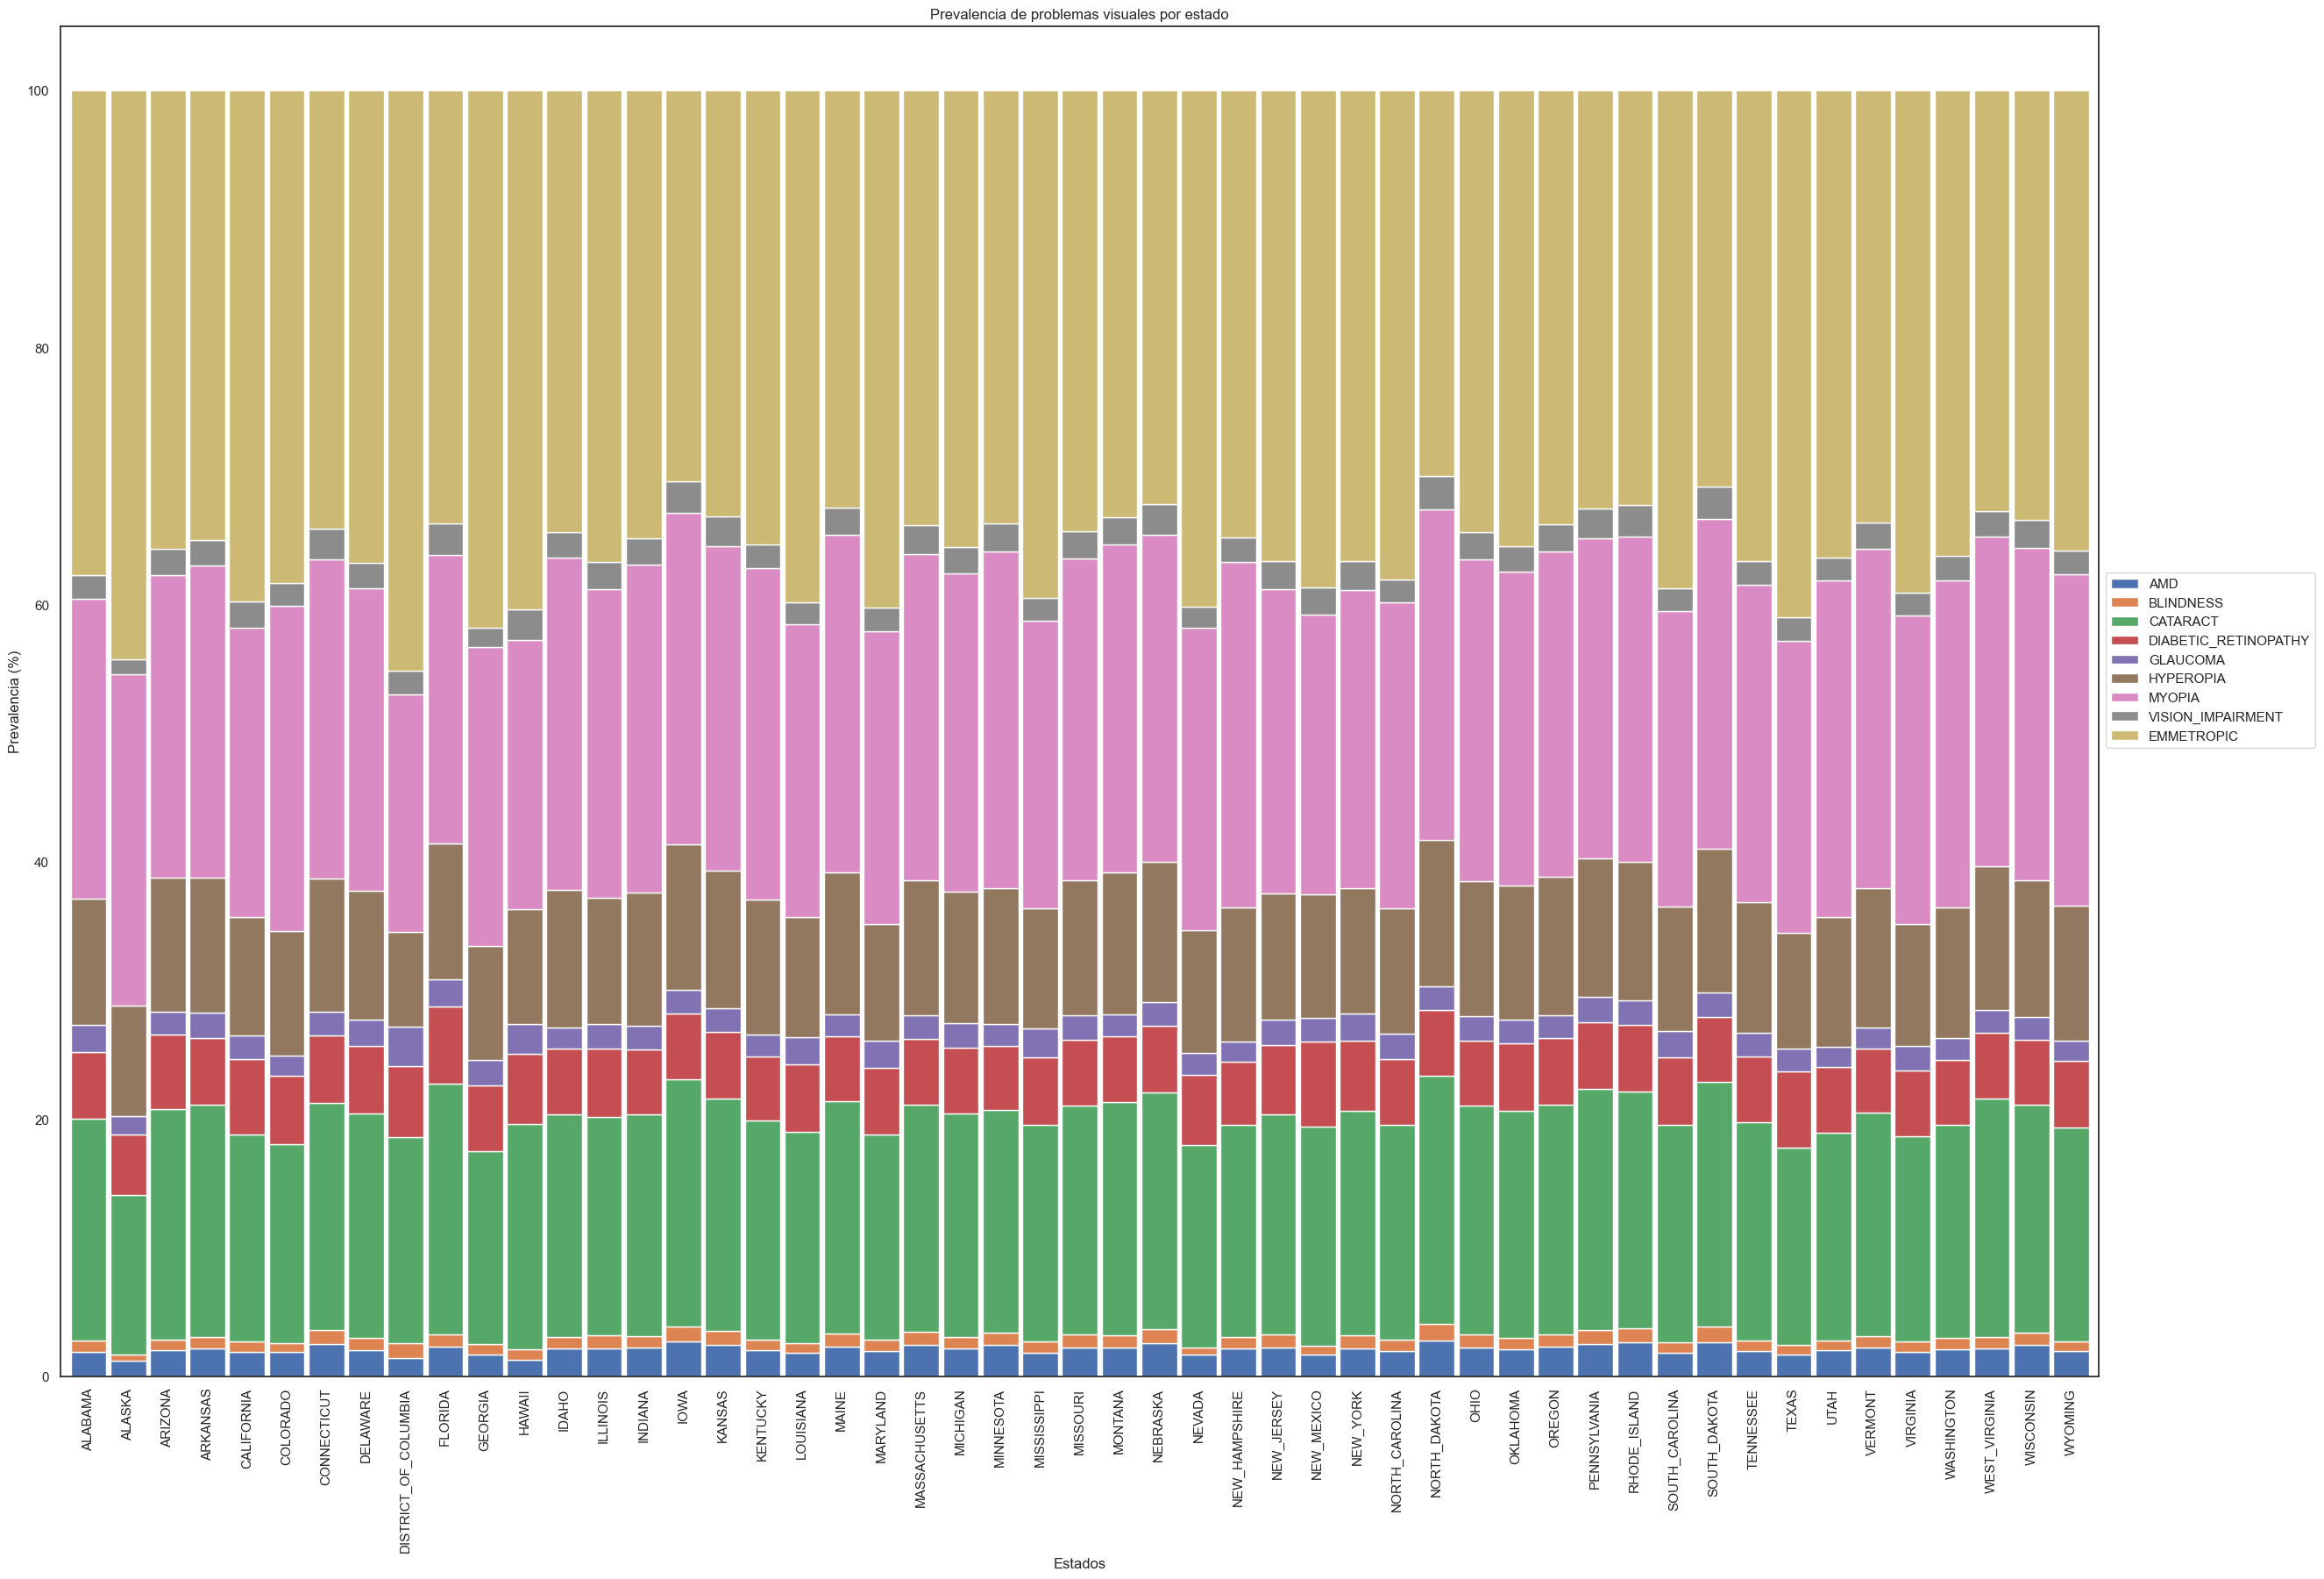

In [21]:
fig, ax = plt.subplots(figsize=(30, 20))
states_probl_prv.plot(kind="bar",stacked=True, ax=ax, width = 0.9)
ax.legend(bbox_to_anchor=(1, 0.6), loc='upper left');
plt.title("Prevalencia de problemas visuales por estado")
plt.xlabel("Estados")
plt.ylabel("Prevalencia (%)")
sns.set(style="white")



En cuanto al numero de casos en general y por estado es el siguiente, no lo vamos a destacar en la presentacíon, pero esta bien verlo en su totalidad.

In [23]:
EEUU_probl_cses = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')
states_probl_cses = states_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')

In [24]:
EEUU_probl_cses

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT
state,,,,,,,,
UNITED_STATES,2069403,1288275,24409978,7685237,2719379,14186819,34119279,2907691


In [25]:
states_probl_cses

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT
state,,,,,,,,
ALABAMA,30359,19527,387030,117199,46778,221731,525188,40856
ALASKA,2357,1365,37036,14012,4250,25738,77104,3364
ARIZONA,41655,23482,512075,164797,50879,298072,671647,58835
ARKANSAS,20787,12684,245571,71318,26300,143278,329724,27326
CALIFORNIA,203405,130011,2606606,939418,303306,1477996,3633510,331727
COLORADO,28171,16445,346432,118298,35859,217153,565597,39330
CONNECTICUT,30804,19605,315962,93101,33975,184300,444664,41595
DELAWARE,6281,3930,75938,22876,8720,43818,102162,8420
DISTRICT_OF_COLUMBIA,2452,2668,39579,13601,7511,18080,45516,4619


Quiero hacer una grafica por cada estado y ver prevalencias en cada estado.

In [34]:
states_only_all[states_only_all["state"] == "ALABAMA"]

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
1005,ALABAMA,AMD,ALL,ALL,ALL,30359,0.0191,2250750
1125,ALABAMA,BLINDNESS,ALL,ALL,ALL,19527,0.0090,2250750
1260,ALABAMA,CATARACT,ALL,ALL,ALL,387030,0.1720,2250750
1395,ALABAMA,DIABETIC_RETINOPATHY,ALL,ALL,ALL,117199,0.0521,2250750
1470,ALABAMA,GLAUCOMA,ALL,ALL,ALL,46778,0.0208,2250750
1605,ALABAMA,HYPEROPIA,ALL,ALL,ALL,221731,0.0985,2250750
1740,ALABAMA,MYOPIA,ALL,ALL,ALL,525188,0.2333,2250750
1875,ALABAMA,VISION_IMPAIRMENT,ALL,ALL,ALL,40856,0.0182,2250750


In [35]:
alabama_id_prev = states_only_all[states_only_all["state"] == "ALABAMA"]["prevalence_rate"].idxmax()
alabama_prev = round(states_only_all.loc[alabama_id_prev,"prevalence_rate"] * 100, 2)
alabama_prev_type = states_only_all.loc[alabama_id_prev,"vision_problem"] 
print(alabama_prev)
print(alabama_prev_type) 

23.33
MYOPIA


Siguiendo esta estructura, voy a crear un bucle que me permita hacer un data frame con los problemas de vision prevalente en cada estado.  
  
Crearé primero una lista vacia la cual voy a ir acumulando los resultado del apartado anterior pero generalizandolo con todos y hacemos otro dataframe de ello

In [70]:
results = []
for state in states_only_all["state"].unique(): # Hacemos bucle de todos los estados
    state_id_prev = states_only_all[states_only_all["state"] == state]["prevalence_rate"].idxmax() #Averiguamos la posicion de mayor prevalencia en el index
    state_prev = round(states_only_all.loc[state_id_prev,"prevalence_rate"] * 100, 2) #Conseguimos la prevalencia y la pasamos a porcentajes
    state_prev_type = states_only_all.loc[state_id_prev,"vision_problem"] #Conseguimos el nombre de problema con mayor prevalencia

    results.append([state,state_prev,state_prev_type]) # Añadimos a la lista results del inicio
states_prev_df = pd.DataFrame(results,columns=["Estado", "Prevalencia", "Tipo_de_problema"]) #Añadimos los resultados a un Dataframe.



Ahora sabremos cual es son los problemas predomintantes en cada estado.

In [71]:
print(states_prev_df["Tipo_de_problema"].unique()) #Comprobamos que la mas predominantes en todos los estados es la miopia

['MYOPIA']


Como vemos la miopia es la predominante en todos los estados.  
  
Ya obtenido el dataframe con la prevalencia dominante en cada uno, haremos un descripción gráfica del contenido.

In [91]:
states_prev_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            51 non-null     object 
 1   Prevalencia       51 non-null     float64
 2   Tipo_de_problema  51 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [101]:
print("La prevalencia mínima en los estados es de", states_prev_df["Prevalencia"].min() ,"y pertenece al estado de",states_prev_df.iloc[states_prev_df["Prevalencia"].idxmin(),0])
print("La prevalencia máxima en los estados es de", states_prev_df["Prevalencia"].max() ,"y pertenece al estado de",states_prev_df.iloc[states_prev_df["Prevalencia"].idxmax(),0])

La prevalencia mínima en los estados es de 18.49 y pertenece al estado de DISTRICT_OF_COLUMBIA
La prevalencia máxima en los estados es de 26.87 y pertenece al estado de NEW_HAMPSHIRE


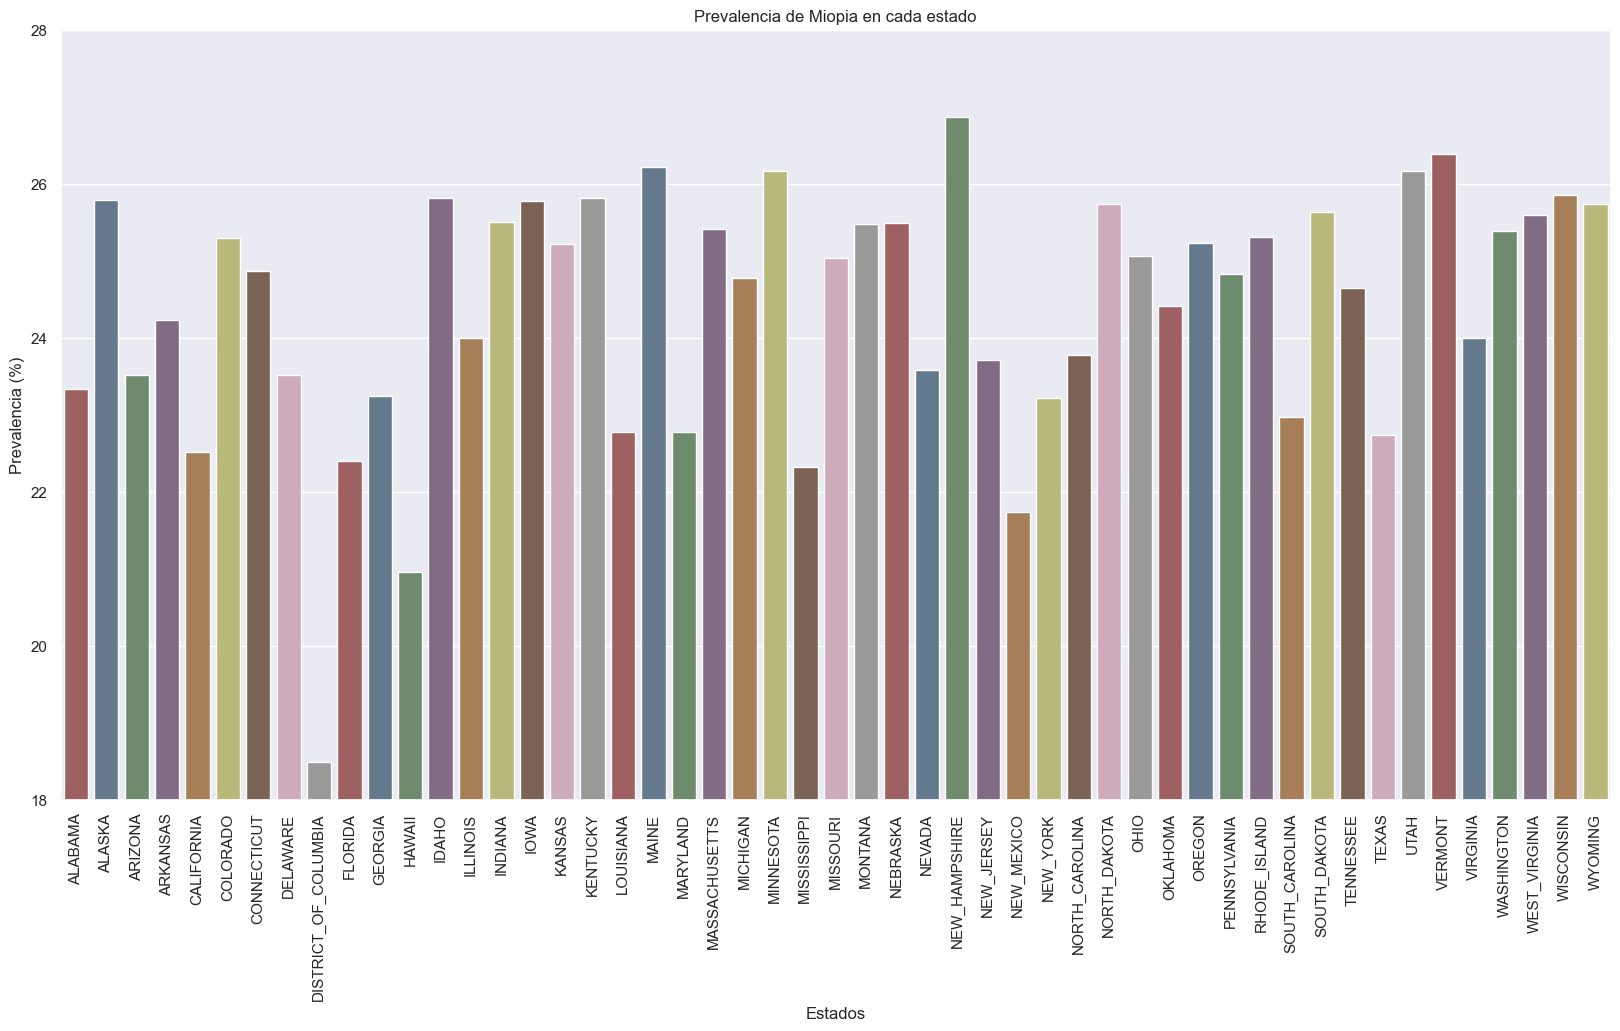

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=states_prev_df, x="Estado", y="Prevalencia",palette="Set1",saturation=0.3)
plt.xticks(rotation=90);
plt.ylim(18,28)
plt.title("Prevalencia de Miopia en cada estado")
plt.ylabel("Prevalencia (%)")
plt.xlabel("Estados")
sns.set(style="darkgrid")



<a id="41"></a> <br>
## 4.1. Conclusiones EEUU  

* Podemos afirmar despues de ver todos los datos tanto en EEUU como en cada estado que la miopía es prevalente en todos los estados.

[Volver al indice](#indice)

<a id="5"></a> <br>
### 5. Valoracion de datos Dataset niñ@s


Lo primero que hacemos es cargar el csv y ver que información tenemos.

In [112]:
myopia_data = pd.read_csv("./Data/Data_main/myopia.csv",sep=";")

In [113]:
myopia_data.info()
myopia_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


Cambiamos los valores de 0 y 1 en todas las miopias y los nombres para aclarar todos los campos.

In [114]:
myopia_data.rename(columns={"STUDYYEAR":"Año de estudio",
                            "MYOPIC":"Miopía",
                            "AGE":"Edad",
                            "GENDER":"Género",
                            "SPHEQ" : "Refracción Equivalente esférico",
                            "AL":"Longitud axial",
                            "ACD":"Profundidad camara anterior",
                            "LT": "Espesor cristalino",
                            "VCD" : "Profundidad camara vitreo",
                            "SPORTHR" : "Horas deporte",
                            "READHR" : "Horas lectura",
                            "COMPHR" : "Horas ordenador",
                            "STUDYHR" : "Horas estudio",
                            "TVHR" : "Horas TV",
                            "DIOPTERHR": "Horas actividades cerca",
                            "MOMMY" : "Miopía Madre",
                            "DADMY":"Miopía Padre"},inplace=True)

In [115]:
myopia_data["Miopía"] = myopia_data["Miopía"].replace({0: False, 1: True})
myopia_data["Miopía Madre"] = myopia_data["Miopía Madre"].replace({0: False, 1: True})
myopia_data["Miopía Padre"] = myopia_data["Miopía Padre"].replace({0: False, 1: True})
myopia_data["Género"] = myopia_data["Género"].replace({0: "Niña", 1: "Niño"})



Vamos a intentar probar que el componente genetico tiene importancia en si una persona es miope o no, por lo que vamos preparando el terreno y haciendo comparaciones para ver si realmente tiene relevancia y los encajamos en una nueva columna.

In [116]:
myopia_data["Miopía Padre solo"] = (myopia_data["Miopía"] == True) & (myopia_data["Miopía Padre"] == True) & (myopia_data["Miopía Madre"] == False)
myopia_data["Miopía Madre solo"] = (myopia_data["Miopía"] == True) & (myopia_data["Miopía Madre"] == True) & (myopia_data["Miopía Padre"] == False)
myopia_data["Miopía Madre y Padre"] = (myopia_data["Miopía"] == True) & (myopia_data["Miopía Madre"] == True) & (myopia_data["Miopía Padre"] == True)

El total de niños y de niñas que tienen miopia en la muestra es el siguiente:

In [117]:
myopia_data[myopia_data["Miopía"] == True]["Género"].value_counts()

Niño    46
Niña    35
Name: Género, dtype: int64

Lo mostramos graficamente viendo que en niños es ligeramente superior la miopia que en niñas.

In [118]:
myopia_data_1 = myopia_data.pivot_table(index='ID', columns='Género', values="Miopía")

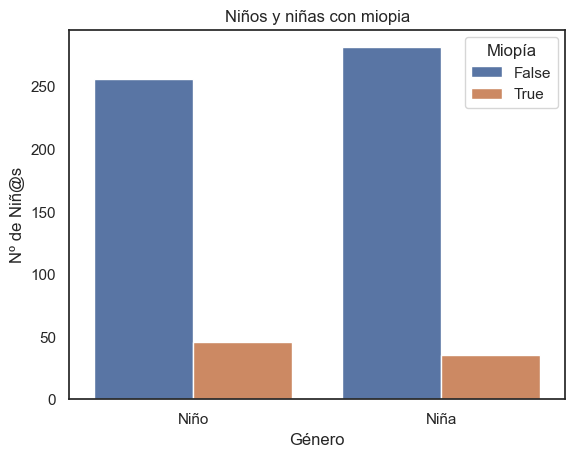

In [119]:
sns.countplot(data=myopia_data, x="Género",hue="Miopía");
plt.title("Niños y niñas con miopia")
plt.ylabel("Nº de Niñ@s");

In [124]:
(myopia_data["Miopía"].sum() / len(myopia_data) * 100).round(2)

13.11

Un 13.11 % de los niñ@s de la muestra tienen miopia.

In [128]:
prob_mom_only = round((len(myopia_data[myopia_data["Miopía"] == True]) / len(myopia_data[myopia_data["Miopía Madre"] == True]))*100,2)
prob_mom_only

25.88

In [129]:
prob_dad_only = round((len(myopia_data[myopia_data["Miopía"] == True]) / len(myopia_data[myopia_data["Miopía Padre"] == True]))*100,2)
prob_dad_only

26.3

In [130]:
prob_momndad_only = round(len(myopia_data[myopia_data["Miopía"] == True]) / len(myopia_data[(myopia_data["Miopía Madre"] == True) & (myopia_data["Miopía Padre"] == True)])*100,2)
prob_momndad_only

52.26

La probabilidad de que un niño sea miope si su madre es miope es de 25.88%, si solo es el padre miope es de 26.3%.  

Si padre y madre son miopes, la probabilidad es de 52.26%

Ademas hay una correlacion positivas entre niños miopes y familiares. [Grafico correlacion variables](#graf)

Ahora analizaremos la longitud axial respecto al equivalente esferico y la miopía, pero primero vamos a ver todas las correlaciones entre todas las variables, nostros tenemos que fijarnos en este caso la relación entre *"Refracción Equivalente esférico"* y *"Longitud axial"*

<a id="graf"></a> <br>
Grafica de correlación entre variables

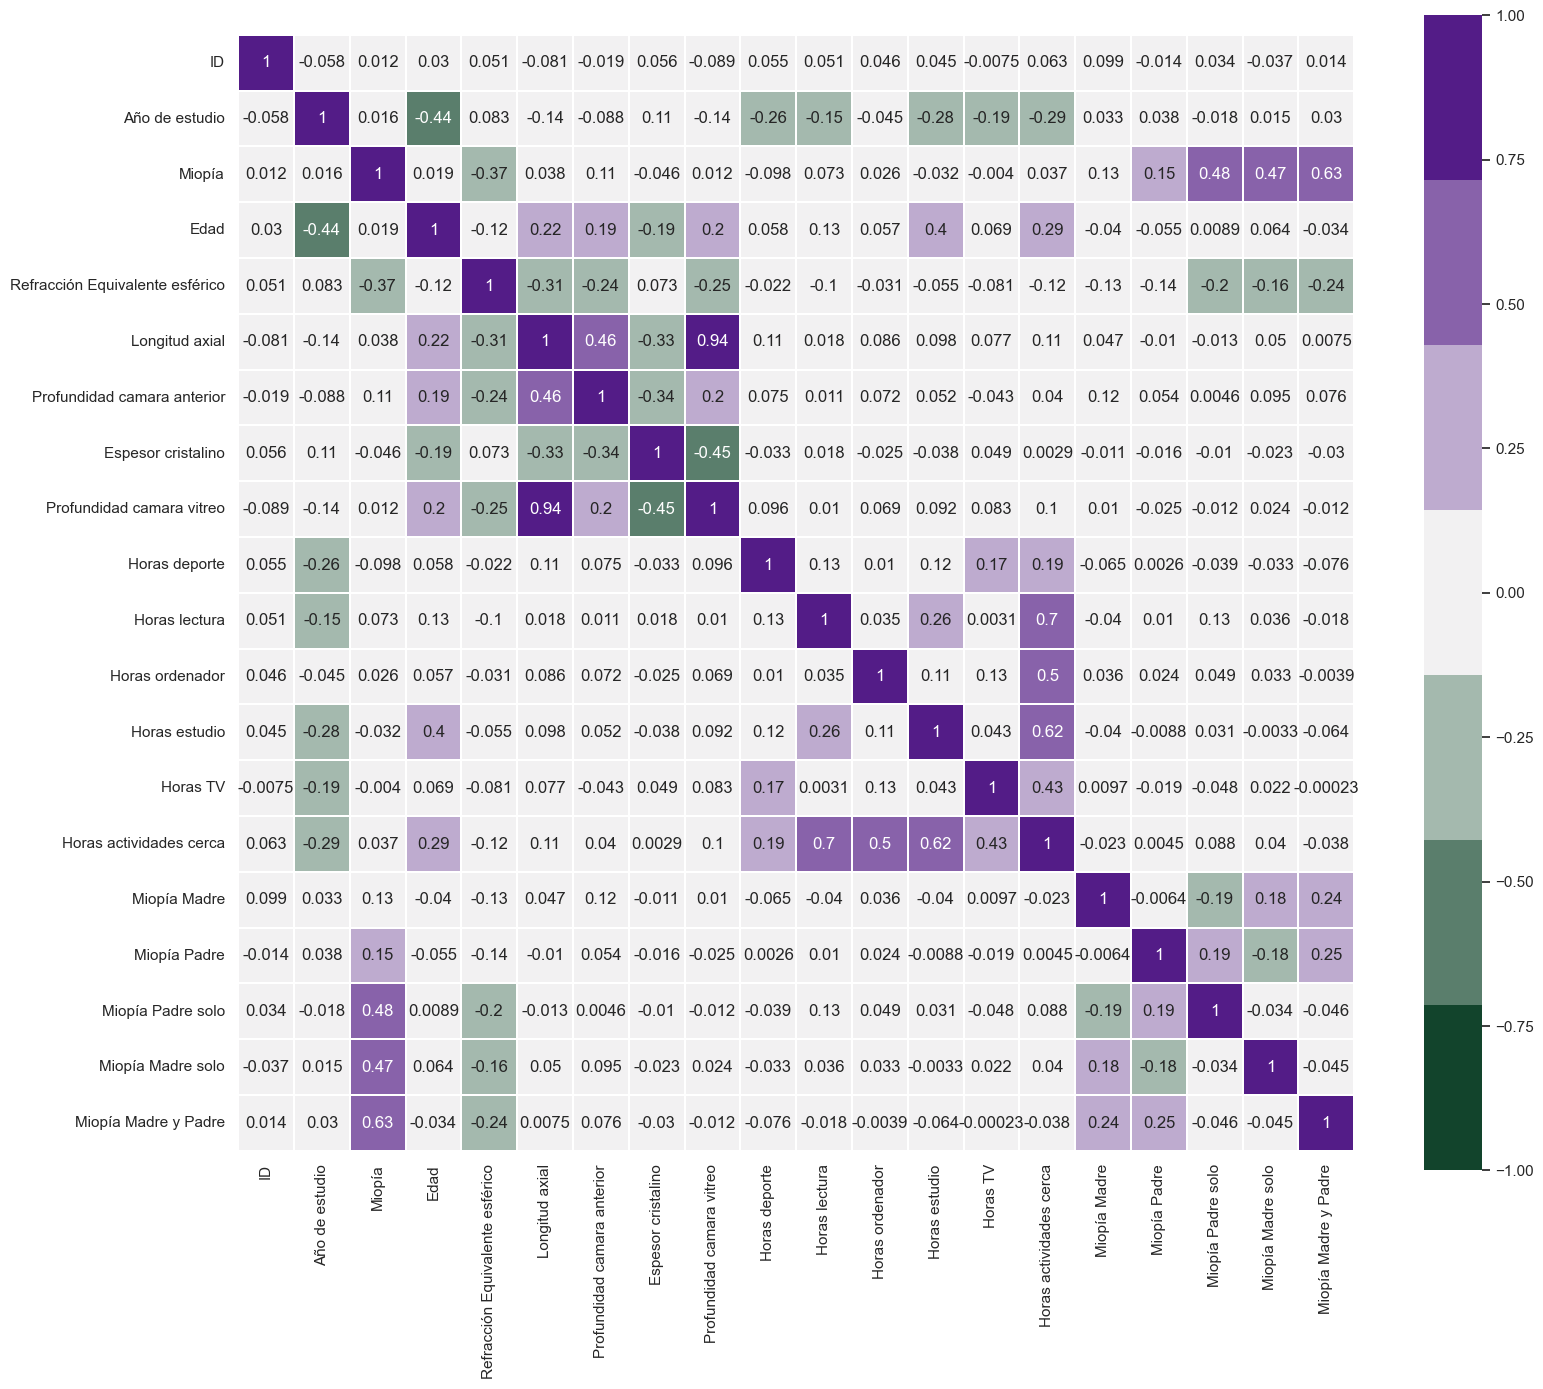

In [142]:
plt.figure(figsize=(18,15))
sns.heatmap(myopia_data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

El coeficiente de correlacion es de -0.31 por lo que podemos intuir que hay una correlacion negativa entre ambas.  
Vamos a comprobar las medias de las longitudes axiales cuando son o no son miopes.

In [147]:
print("La media de la longitud axial cuando hay miopia es de", round(myopia_data[myopia_data["Miopía"] == True]["Longitud axial"].mean(),2))


La media de la longitud axial cuando hay miopia es de 22.56


In [148]:
print("La media de la longitud axial cuando no hay miopia es de",round(myopia_data[myopia_data["Miopía"] == False]["Longitud axial"].mean(),2))

La media de la longitud axial cuando no hay miopia es de 22.49


En un primer vistazo vemos que las medias cuando hay miopia son mas altas que cuando no las hay.

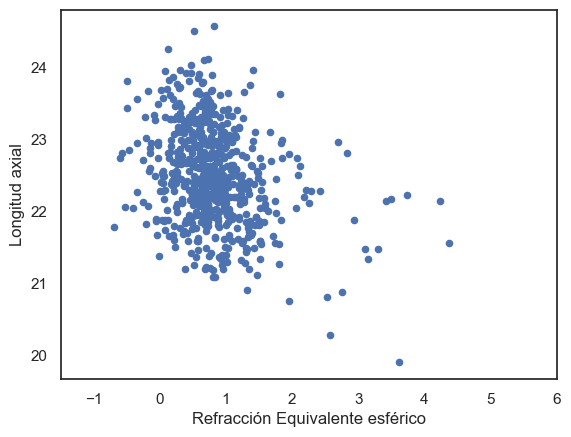

In [135]:
myopia_data.plot("Refracción Equivalente esférico","Longitud axial",kind="scatter",legend=False)
plt.xlim(-1.5,6);

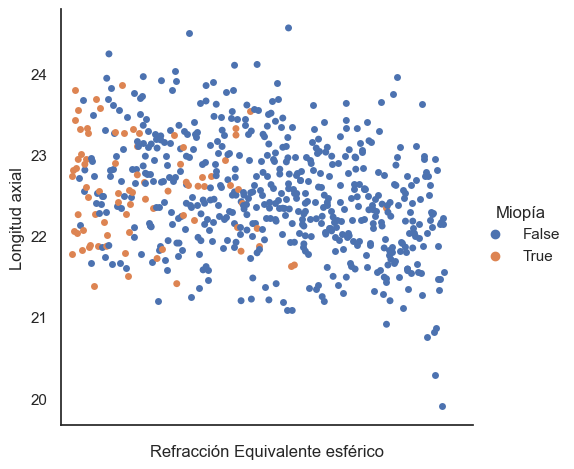

In [136]:
sns.catplot(x="Refracción Equivalente esférico", y="Longitud axial",hue="Miopía", data=myopia_data).set(xticklabels = [])
plt.xlim(-15,550);


Al hacer scatterplot vemos que hay correlacion negativa y que al separar entre miopia y no miopia, si que observamos que los valores de miopias estan mas cerca de valores de Refracciones negativas (Los valores negativos son los que necesitamos para corregir las miopias). 
  
   
Habiendo una correlación negativa entre ambos, a menor refracción (es decir una refracción más negativa) tendremos una longitud axial mayor.
Aún así para estar seguros al 100% de ello habria que tener una muestra de los mismos niños y su evolución durante el tiempo ya que solo tenemos un valor de longitud axial y los suyo sería hacerlo despues de 7 a 8 años.  

<a id="51"></a> <br>
### 5.1. Conclusión niñ@s
* El parentesco familiar tiene influencia en el desarrollo de miopia en los niños y niñas.
* La longitud axial esta indirectamente relacionada con la refracción del equivalente esférico, a menor refracción (más negativo) mayor es la longitud axial. Aún así deberiamos de tener una muestra más grande y con mayor evolución en el tiempo para estar 100% seguros de esta afirmación.

[Volver al indice](#indice)

<a id="6"></a> <br>
### 6. Valoración de datos Ópticas

Una vez vistos los datos y sus relaciones en campos amplios y campos mas personalizados, queremos ver cual es la mejor solucion economica para paliar este tipo de problemas visuales.  
  
Primero cargamos el csv y obtenemos información sobre él (Aunque al crearlo nosotros desde 0 ya sabemos que hay en él y como está ordenado)

In [149]:
opt_prod = pd.read_csv("./Data/Data_main/todo_conc_opticas.csv",index_col=0)

In [150]:
opt_prod.head()

,Empresa,Nombre completo,Categoria,Producto,Reemplazo,Precio
0,Alain Afflelou,ACUVUE® OASYS MAX 1-Day - 30L,Lentes de contacto,Acuvue,Diarias,40.0
1,Alain Afflelou,AIR OPTIX AQUA ESFÉRICA - 3L,Lentes de contacto,Air Optix,Mensual,31.0
2,Alain Afflelou,AIR OPTIX NIGHT & DAY - 6L,Lentes de contacto,Air Optix,Mensual,77.0
3,Alain Afflelou,AIR OPTIX NIGHT & DAY - 6L,Lentes de contacto,Air Optix,Mensual,77.0
4,Alain Afflelou,AIR OPTIX ESFÉRICA AQUA - 6L,Lentes de contacto,Air Optix,Mensual,48.5


In [14]:
opt_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Empresa          716 non-null    object 
 1   Nombre completo  716 non-null    object 
 2   Categoria        716 non-null    object 
 3   Producto         716 non-null    object 
 4   Reemplazo        164 non-null    object 
 5   Precio           716 non-null    float64
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


In [164]:
opt_prod.groupby(["Empresa","Categoria"])["Precio"].describe()

count        mean  \
Empresa              Categoria                                        
Alain Afflelou       Lentes de contacto            54.0   42.250000   
                     Líquidos                       5.0   14.650000   
                     Ofertas montura + cristales  144.0  116.083333   
Greyhounders         Lentes de contacto             5.0   39.888000   
                     Líquidos                       2.0    5.400000   
                     Ofertas montura + cristales   72.0   42.750000   
Opticalia            Lentes de contacto            37.0   46.170270   
                     Líquidos                       4.0    8.875000   
                     Ofertas montura + cristales  120.0  101.926667   
Óptica Universitaria Lentes de contacto            68.0   46.557353   
                     Líquidos                      22.0    7.915909   
                     Ofertas montura + cristales  183.0   60.607377   

                                                        std    min     25%  \
Empresa              Categoria                                               
Alain Afflelou       Lentes de contacto           25.401632  15.00  26.500   
                     Líquidos                     10.176321   5.50   7.500   
                     Ofertas montura + cristales  26.228554  39.00  99.000   
Greyhounders         Lentes de contacto           16.984407  19.46  33.090   
                     Líquidos                      2.121320   3.90   4.650   
                     Ofertas montura + cristales  10.405510  29.00  39.000   
Opticalia            Lentes de contacto           15.682693  18.95  38.000   
                     Líquidos                      2.657536   6.00   7.125   
                     Ofertas montura + cristales  12.747626  79.00  94.900   
Óptica Universitaria Lentes de contacto           23.717047  15.00  29.000   
                     Líquidos                      3.536994   2.50   5.125   
                     Ofertas montura + cristales  17.312554  32.00  49.000   

                                                    50%      75%     max  
Empresa              Categoria                                            
Alain Afflelou       Lentes de contacto           35.00   47.250  150.00  
                     Líquidos                     13.45   15.500   31.30  
                     Ofertas montura + cristales  99.00  129.000  159.00  
Greyhounders         Lentes de contacto           34.85   47.520   64.52  
                     Líquidos                      5.40    6.150    6.90  
                     Ofertas montura + cristales  39.00   49.000   59.00  
Opticalia            Lentes de contacto           43.00   52.500   85.50  
                     Líquidos                      8.75   10.500   12.00  
                     Ofertas montura + cristales  99.90  109.900  119.90  
Óptica Universitaria Lentes de contacto           38.00   59.000  127.00  
                     Líquidos                      7.50   10.875   15.00  
                     Ofertas montura + cristales  49.00   79.000   91.25

Primero quería observar la oferta de producto web que tiene cada empresa.

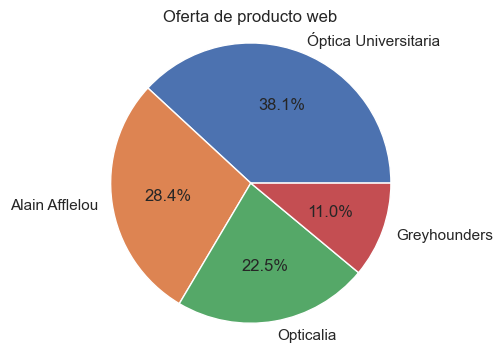

In [19]:
categ = opt_prod["Empresa"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(categ, labels=categ.index, autopct='%1.1f%%')
plt.title("Oferta de producto web")
plt.axis("equal")
plt.show()

En esta gráfica ya estamos observando que las ópticas más "nuevas" la oferta de su producto es pequeña.  
  
Primero abordaremos las lentes de contacto.

In [151]:
opt_prod_not_na = opt_prod[opt_prod["Reemplazo"].notna()]

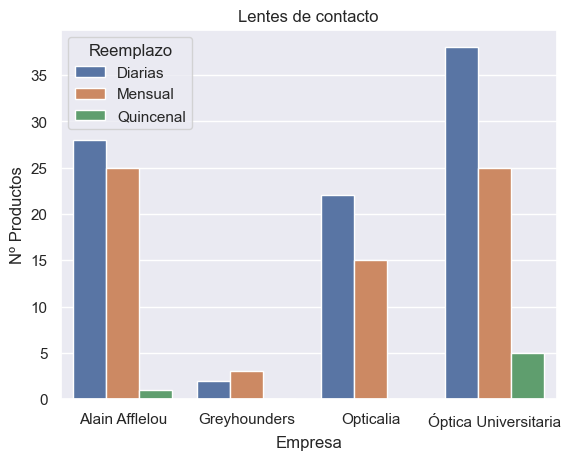

In [153]:
sns.set(style="darkgrid")
sns.countplot(x=opt_prod_not_na["Empresa"],hue=opt_prod_not_na["Reemplazo"])
plt.ylabel("Nº Productos")
plt.title("Lentes de contacto");

Volvemos a observar que el número de productos de las ópticas más recientes tienes menos producto en cuanto a lentes de contacto.

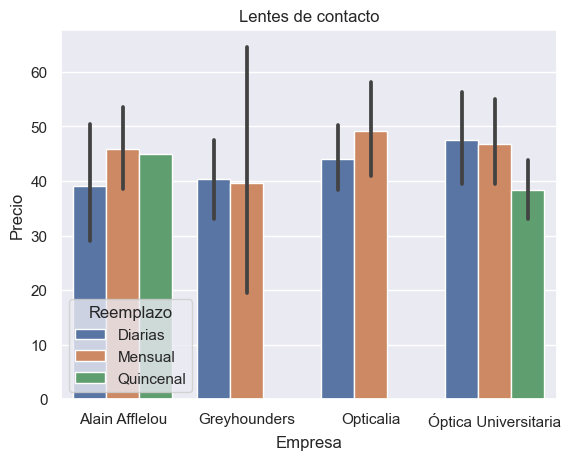

In [160]:
sns.set(style="darkgrid")
sns.barplot(data=opt_prod_not_na, x="Empresa", y="Precio", hue="Reemplazo");
plt.ylabel("Precio");
plt.title("Lentes de contacto");


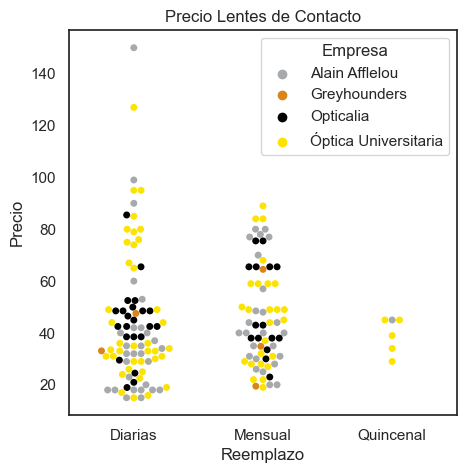

In [163]:
sns.set(style="white")
plt.figure(figsize=(5,5))
sns.swarmplot(x="Reemplazo", y="Precio", hue="Empresa", data=opt_prod_not_na, palette=list_colors)
plt.title("Precio Lentes de Contacto", loc="center");

En cuanto el precio de las lentes de contacto es bastante similar, la diferencia entre todas las empresas reside en el volumen de producto, la empresa nueva se asegura la venta de ese poco producto sin gastar en más proveedores y así evitarse gastos por ese riesgo.

El producto ofrecido en web por todas las empresas es mayoritariamente de moturas más cristales.

In [158]:
list_colors = ["#A7AAAC","#D98518","#000000","#FCE300"]

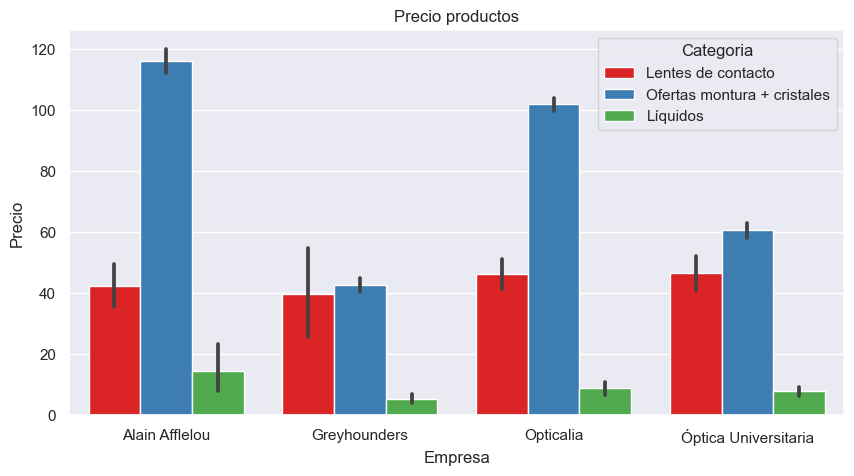

In [168]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Empresa", y="Precio", hue="Categoria", data=opt_prod, palette="Set1",saturation=0.9); 
plt.title("Precio productos", loc="center");

Como hemos visto al inicio de este apartado, los precios medios de las gafas en este caso en *"Grey Hounders"* son los más económicos.

In [161]:
opt_solo_gafas = opt_prod[opt_prod["Categoria"]=="Ofertas montura + cristales"]

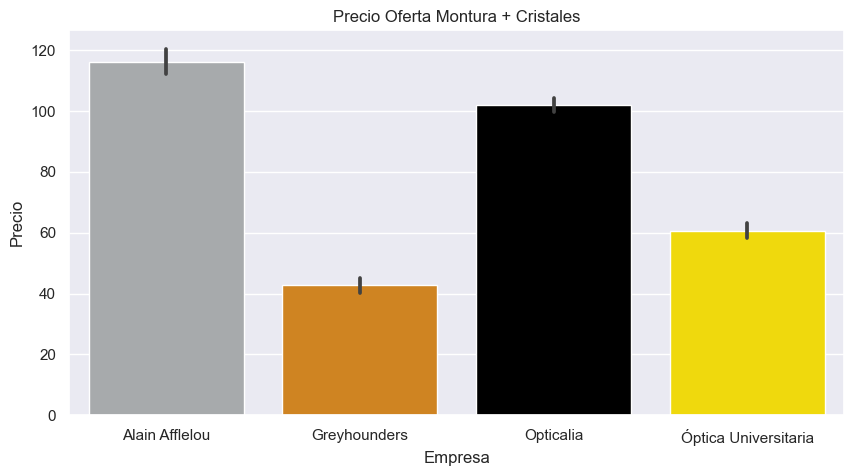

In [176]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Empresa", y="Precio", data=opt_solo_gafas, palette=list_colors,saturation=0.9); 
plt.title("Precio Oferta Montura + Cristales", loc="center");

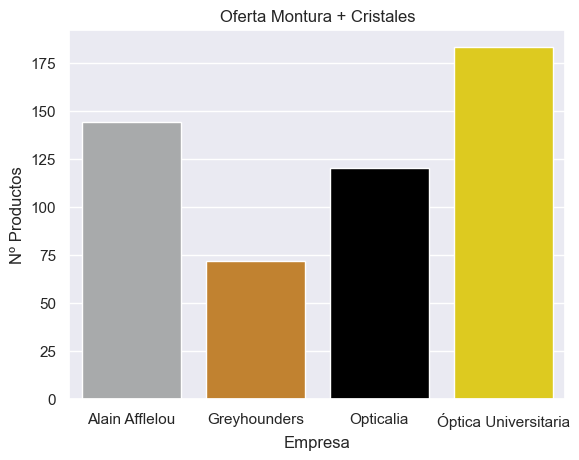

In [173]:
sns.set(style="darkgrid")
sns.countplot(x=opt_solo_gafas["Empresa"],palette=list_colors)
plt.ylabel("Nº Productos")
plt.title("Oferta Montura + Cristales");

<a id="61"></a> <br>
## 6.1 Conclusiones Ópticas
* Las ópticas de reciente apertura tienen precios más económicos en montura y cristales pero a su vez menos producto que ofrecer a sus clientes.
* Las lentes de contacto tienen precios bastante similares entre las diferentes empresas. Las ópticas más recientes tienen menos producto también en lentes de contacto.


<a id="7"></a> <br>
## 7. Resumen conclusiones finales.

* Podemos afirmar despues de ver todos los datos tanto en EEUU como en cada estado que la miopía es prevalente en todos los estados.

* El parentesco familiar tiene influencia en el desarrollo de miopia en los niños y niñas.
* La longitud axial esta indirectamente relacionada con la refracción del equivalente esférico, a menor refracción (más negativo) mayor es la longitud axial. Aún así deberiamos de tener una muestra más grande y con mayor evolución en el tiempo para estar 100% seguros de esta afirmación.  

* Las ópticas de reciente apertura tienen precios más económicos en montura y cristales pero a su vez menos producto que ofrecer a sus clientes.
* Las lentes de contacto tienen precios bastante similares entre las diferentes empresas. Las ópticas más recientes tienen menos producto también en lentes de contacto.



[Volver al indice](#indice)